<a href="https://colab.research.google.com/github/thenameistar/Cellular_automata/blob/main/Compsci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

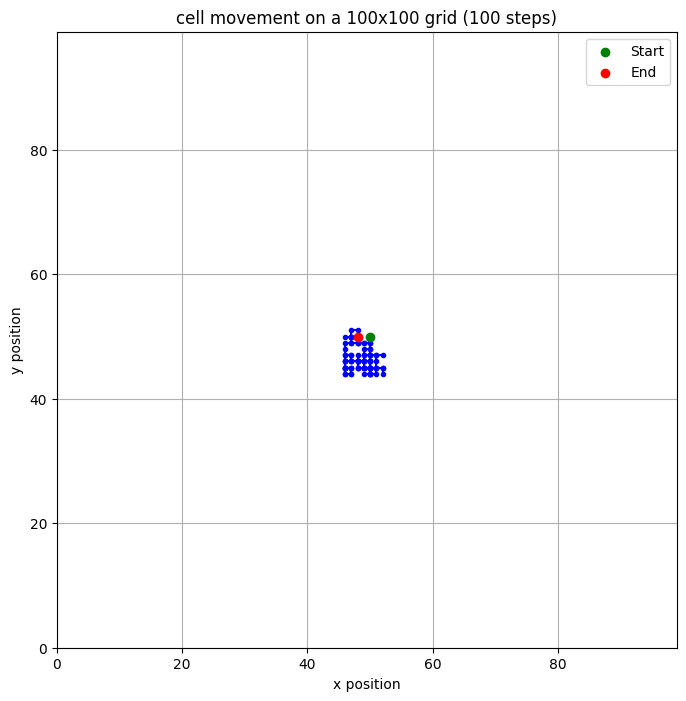

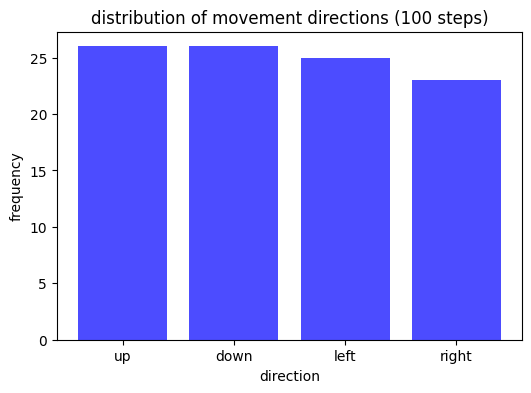

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# set up the grid and the starting position
grid_size = 100
x, y = grid_size // 2, grid_size // 2  # start at the center
positions = [(x, y)]  # track the cell's movement

# initialise direction counters
directions = {"up": 0, "down": 0, "left": 0, "right": 0}

# simulate the movement for 100 steps
for _ in range(100):
    rand1 = np.random.randint(0, 2)  # generate a random value (0 or 1)
    rand2 = np.random.randint(0, 2)  # generate another random value (0 or 1)

    # decide the direction of movement
    if rand1 == 1 and rand2 == 1:
        y += 1  # move up
        directions["up"] += 1
    elif rand1 == 1 and rand2 == 0:
        y -= 1  # move down
        directions["down"] += 1
    elif rand1 == 0 and rand2 == 1:
        x -= 1  # move left
        directions["left"] += 1
    elif rand1 == 0 and rand2 == 0:
        x += 1  # move right
        directions["right"] += 1

    # keep the cell within the grid
    x = max(0, min(grid_size - 1, x))
    y = max(0, min(grid_size - 1, y))

    # save the new position
    positions.append((x, y))

# extract x and y coordinates for plotting
x_positions, y_positions = zip(*positions)

# plot the movement of the cell
plt.figure(figsize=(8, 8))
plt.plot(x_positions, y_positions, marker='o', markersize=3, linestyle='-', color='blue')
plt.title("cell movement on a 100x100 grid (100 steps)")
plt.xlabel("x position")
plt.ylabel("y position")
plt.grid(True)
plt.xlim(0, grid_size - 1)
plt.ylim(0, grid_size - 1)
plt.scatter(x_positions[0], y_positions[0], color='green', label='Start', zorder=5)
plt.scatter(x_positions[-1], y_positions[-1], color='red', label='End', zorder=5)
plt.legend()
plt.show()

# plot a histogram for the direction distribution
plt.figure(figsize=(6, 4))
plt.bar(directions.keys(), directions.values(), color='blue', alpha=0.7)
plt.title("distribution of movement directions (100 steps)")
plt.xlabel("direction")
plt.ylabel("frequency")
plt.show()

In [ ]:
# function to simulate movement
def simulate_movement(steps):
    # start in the center of the grid
    x, y = grid_size // 2, grid_size // 2
    positions = [(x, y)]  # this will track the cell's trajectory
    directions = {"up-right": 0, "up-left": 0, "down-right": 0, "down-left": 0}  # keep track of how often each direction is used

    for _ in range(steps):
        # generate random numbers for x and y
        rand_x = np.random.randint(0, 2)
        rand_y = np.random.randint(0, 2)

        # update x based on rand_x
        if rand_x == 0:
            x -= 1  # move left
        else:
            x += 1  # move right

        # update y based on rand_y
        if rand_y == 0:
            y -= 1  # move down
        else:
            y += 1  # move up

        # track which diagonal direction was taken
        if rand_x == 1 and rand_y == 1:
            directions["up-right"] += 1
        elif rand_x == 0 and rand_y == 1:
            directions["up-left"] += 1
        elif rand_x == 1 and rand_y == 0:
            directions["down-right"] += 1
        elif rand_x == 0 and rand_y == 0:
            directions["down-left"] += 1

        # keep the cell within the grid bounds
        x = max(0, min(grid_size - 1, x))
        y = max(0, min(grid_size - 1, y))

        # save the new position
        positions.append((x, y))

    return positions, directions

In [ ]:
# simulate for 100, 1000, and 10,000 steps
positions_100, directions_100 = simulate_movement(100)
positions_1000, directions_1000 = simulate_movement(1000)
positions_10000, directions_10000 = simulate_movement(10000)

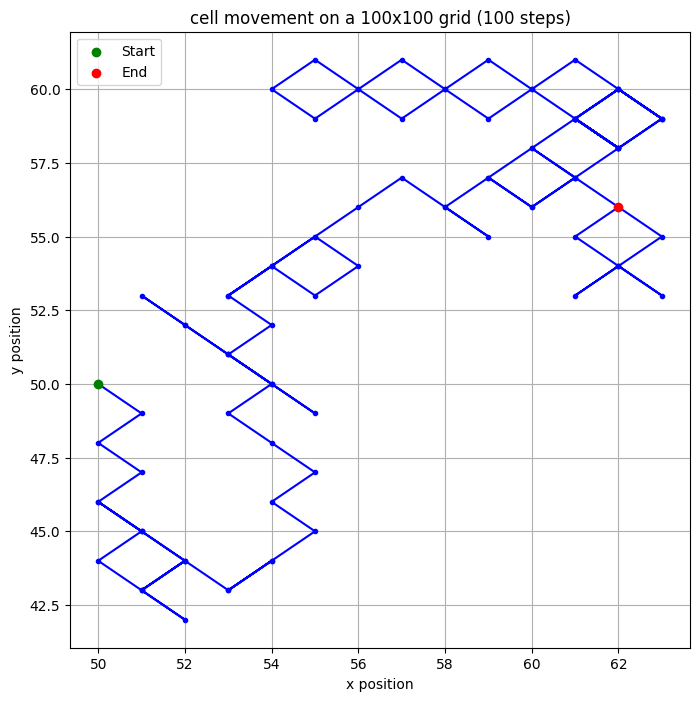

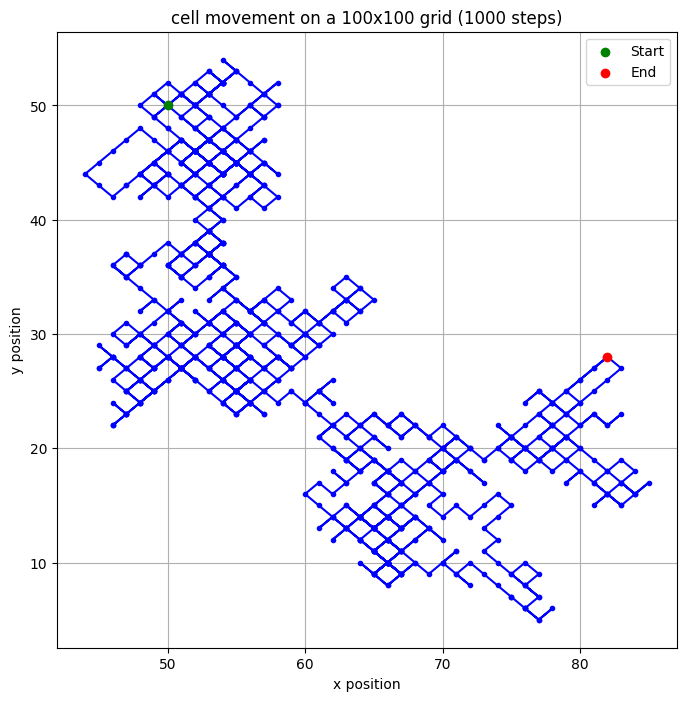

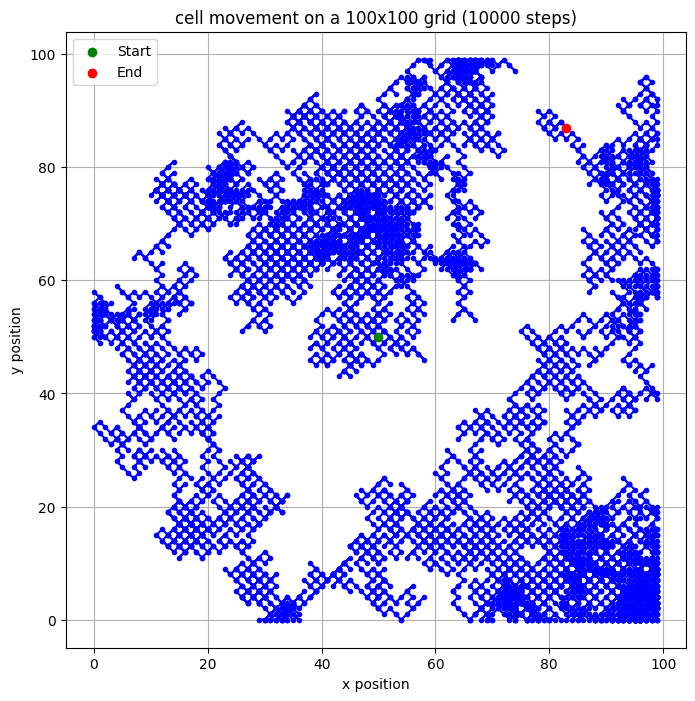

In [ ]:
# function to plot the trajectory
def plot_trajectory(positions, steps):
    # extract x and y positions from the trajectory
    x_positions, y_positions = zip(*positions)
    plt.figure(figsize=(8, 8))
    # plot the path of the cell
    plt.plot(x_positions, y_positions, marker='o', markersize=3, linestyle='-', color='blue')
    # mark the start position in green
    plt.scatter(x_positions[0], y_positions[0], color='green', label='Start', zorder=5)
    # mark the end position in red
    plt.scatter(x_positions[-1], y_positions[-1], color='red', label='End', zorder=5)
    plt.title(f"cell movement on a 100x100 grid ({steps} steps)")
    plt.xlabel("x position")
    plt.ylabel("y position")
    plt.legend()
    plt.grid(True)
    plt.show()

# plot trajectories for 100, 1000, and 10,000 steps
plot_trajectory(positions_100, 100)
plot_trajectory(positions_1000, 1000)
plot_trajectory(positions_10000, 10000)

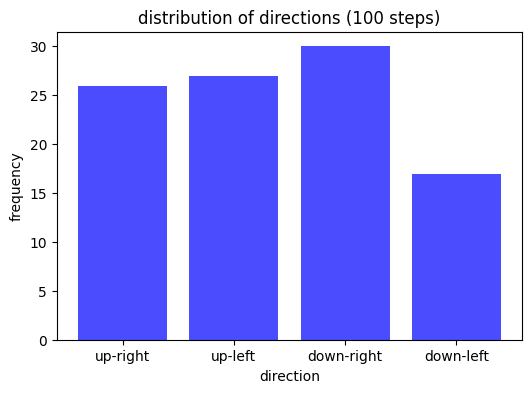

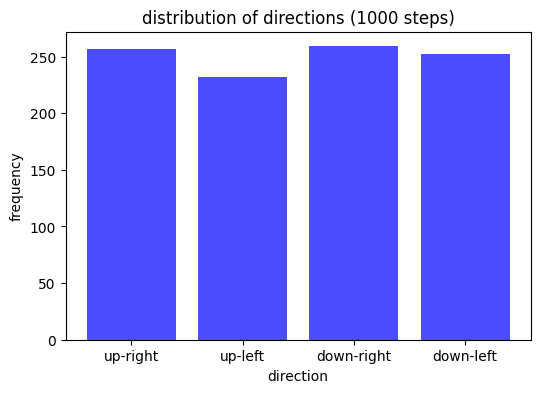

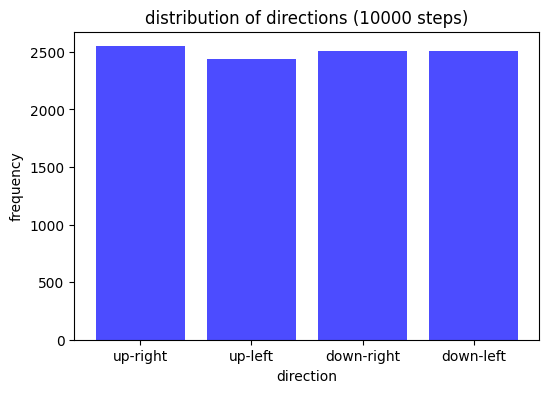

In [ ]:
# function to check and plot the direction uniformity
def plot_directions(directions, steps):
    plt.figure(figsize=(6, 4))
    # create a bar chart for the directions
    plt.bar(directions.keys(), directions.values(), color='blue', alpha=0.7)
    plt.title(f"distribution of directions ({steps} steps)")
    plt.xlabel("direction")
    plt.ylabel("frequency")
    plt.show()

# plot direction distributions for 100, 1000, and 10,000 steps
plot_directions(directions_100, 100)
plot_directions(directions_1000, 1000)
plot_directions(directions_10000, 10000)

In [ ]:
def find_common_points(positions1, positions2):
    return set(positions1).intersection(set(positions2))

# find common points between 100 and 1000 steps
common_points_100_1000 = find_common_points(positions_100, positions_1000)

# find common points between 1000 and 10,000 steps
common_points_1000_10000 = find_common_points(positions_1000, positions_10000)

print(f"common points between 100 and 1000 steps: {len(common_points_100_1000)}")
print("Coordinates:", common_points_100_1000)

print(f"common points between 1000 and 10,000 steps: {len(common_points_1000_10000)}")
print("Coordinates:", common_points_1000_10000)

common points between 100 and 1000 steps: 25
Coordinates: {(50, 46), (51, 47), (52, 52), (53, 53), (54, 46), (54, 52), (55, 47), (55, 53), (52, 42), (50, 48), (51, 43), (51, 49), (53, 43), (53, 49), (54, 48), (54, 54), (55, 49), (50, 44), (52, 44), (50, 50), (51, 45), (54, 44), (53, 51), (54, 50), (55, 45)}
common points between 1000 and 10,000 steps: 172
Coordinates: {(72, 18), (50, 52), (73, 17), (64, 14), (67, 13), (62, 26), (70, 18), (64, 32), (76, 6), (65, 15), (66, 14), (79, 17), (78, 6), (81, 23), (82, 22), (54, 24), (64, 34), (77, 19), (76, 8), (80, 24), (83, 23), (75, 19), (66, 16), (79, 19), (71, 15), (62, 12), (81, 25), (62, 30), (77, 21), (69, 17), (76, 10), (80, 26), (75, 21), (66, 18), (79, 21), (62, 14), (63, 13), (81, 27), (82, 26), (64, 20), (77, 5), (77, 23), (78, 22), (69, 19), (60, 16), (61, 15), (55, 47), (72, 8), (79, 23), (62, 16), (65, 33), (63, 15), (44, 44), (82, 28), (77, 7), (67, 15), (57, 47), (74, 8), (77, 25), (75, 7), (78, 24), (61, 17), (65, 17), (55, 4

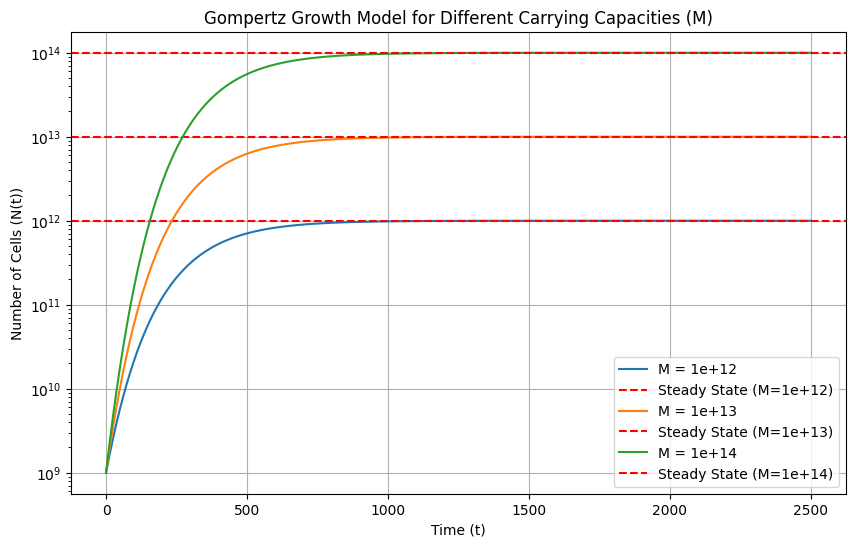

Time to reach 64% of 1e+12: 459 time units
Time to reach 64% of 1e+13: 508 time units
Time to reach 64% of 1e+14: 546 time units


In [ ]:
# define Gompertz Growth function
def gompertz_growth(t_max, k, M, N0, dt=1):
    """
    Simulate the Gompertz growth model.
    """
    time_points = np.arange(0, t_max + dt, dt)
    N_values = [N0]

    for t in time_points[:-1]:
        N = N_values[-1]
        dN_dt = k * N * np.log(M / N)
        N_new = N + dN_dt * dt
        N_values.append(N_new)

    return time_points, N_values

# time to threshold function
def time_to_reach_threshold(time_points, N_values, threshold):
    for t, N in zip(time_points, N_values):
        if N >= threshold:
            return t
    return None

# parameters
k = 0.006
N0 = 10**9
dt = 1
M_values = [10**12, 10**13, 10**14]
t_max = 2500

# plot Gompertz Growth model
plt.figure(figsize=(10, 6))
for M in M_values:
    time_points, N_values = gompertz_growth(t_max, k, M, N0, dt)
    plt.plot(time_points, N_values, label=f"M = {M:.0e}")
    plt.axhline(y=M, color='red', linestyle='--', label=f"Steady State (M={M:.0e})")

plt.title("Gompertz Growth Model for Different Carrying Capacities (M)")
plt.xlabel("Time (t)")
plt.ylabel("Number of Cells (N(t))")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.show()

# calculate and Print Time to Reach 64% of M
for M in M_values:
    time_points, N_values = gompertz_growth(t_max, k, M, N0, dt)
    threshold = 0.64 * M
    t_threshold = time_to_reach_threshold(time_points, N_values, threshold)
    print(f"Time to reach 64% of {M:.0e}: {t_threshold} time units")

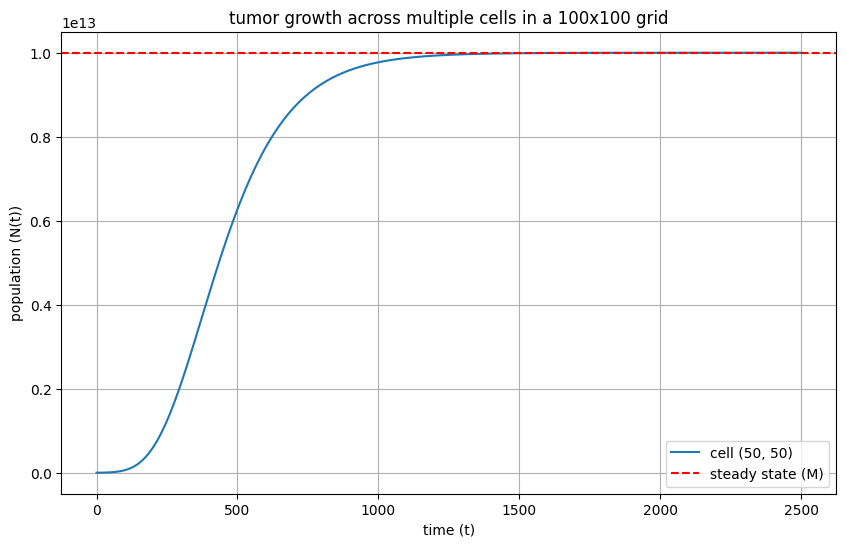

In [18]:
def extended_gompertz_growth(grid_size, t_max, k, M, N0, dt):
    """
    simulate gompertz growth for a 2d grid of cells, starting from the center
    """
    # initialize a 2d grid
    grid = np.zeros((grid_size, grid_size))  # all cells are initially unoccupied
    center = grid_size // 2  # center of the grid
    grid[center, center] = 1  # tumor starts at the center

    # define directions for neighbors (8 possible directions)
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]
    occupied_cells = [(center, center)]  # track the currently occupied cells

    # dictionary to store growth results for each cell
    results = {}

    while len(occupied_cells) < 9:  # limit simulation to 9 cells for simplicity
        for cell in occupied_cells:
            x, y = cell
            if cell not in results:
                # simulate growth for the current cell
                time_points, N_values = gompertz_growth(t_max, k, M, N0, dt)
                results[cell] = (time_points, N_values)

            # check neighboring cells to add them to simulation
            for dx, dy in directions:
                nx, ny = x + dx, y + dy
                # ensure neighbor is within bounds and not already occupied
                if 0 <= nx < grid_size and 0 <= ny < grid_size and grid[nx, ny] == 0:
                    grid[nx, ny] = 1  # mark cell as occupied
                    occupied_cells.append((nx, ny))

                    # stop if we’ve simulated enough cells
                    if len(occupied_cells) >= 9:
                        break
            if len(occupied_cells) >= 9:
                break

    return grid, results


# parameters
grid_size = 100
t_max = 2500
k = 0.006
M = 10**13
N0 = 10**9
dt = 1  # use a reasonable step size for time

# run the extended simulation
grid, results = extended_gompertz_growth(grid_size, t_max, k, M, N0, dt)

# plotting results
plt.figure(figsize=(10, 6))
for (x, y), (time_points, N_values) in results.items():
    # each cell's trajectory is plotted
    plt.plot(time_points, N_values, label=f"cell ({x}, {y})")

# add the steady-state red dashed line
plt.axhline(y=M, color='red', linestyle='--', label="steady state (M)")

# add titles and labels
plt.title("tumor growth across multiple cells in a 100x100 grid")
plt.xlabel("time (t)")
plt.ylabel("population (N(t))")
plt.legend(loc="best")
plt.grid()
plt.show()

